# Exploratory Data Analysis (EDA) – E-commerce Fraud Dataset

This notebook explores the **Fraud_Data.csv** and **IpAddress_to_Country.csv** datasets.
The goal is to understand data structure, identify quality issues, analyze class imbalance,
and prepare for feature engineering and geolocation integration.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [5]:
fraud_df = pd.read_csv("../data/raw/Fraud_Data.csv")
ip_df = pd.read_csv("../data/raw/IpAddress_to_Country.csv")


In [6]:
print("Fraud_Data shape:", fraud_df.shape)
print("IP-to-Country shape:", ip_df.shape)


Fraud_Data shape: (151112, 11)
IP-to-Country shape: (138846, 3)


In [8]:
fraud_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [9]:
ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [10]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [11]:
fraud_df.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [12]:
fraud_df['class'].value_counts()

class
0    136961
1     14151
Name: count, dtype: int64

In [13]:
fraud_df['class'].value_counts(normalize=True) * 100

class
0    90.635423
1     9.364577
Name: proportion, dtype: float64

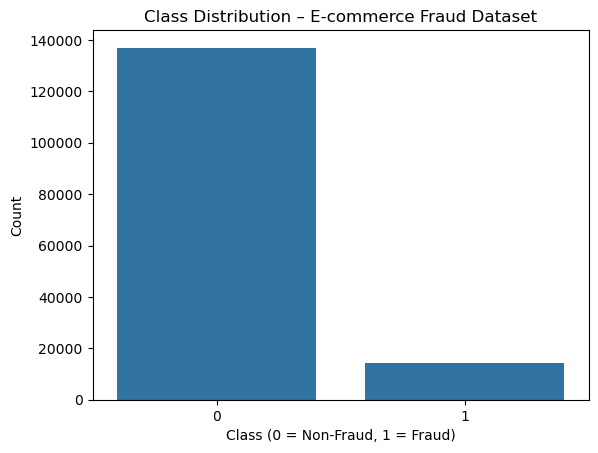

In [14]:
sns.countplot(x='class', data=fraud_df)
plt.title("Class Distribution – E-commerce Fraud Dataset")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [15]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Key Observations

- The e-commerce fraud dataset contains a mix of numerical, categorical, temporal, and network
  features.
- Timestamp fields (`signup_time`, `purchase_time`) are stored as strings and will require
  conversion to datetime format.
- The `ip_address` field is stored as a floating-point number, which is incompatible with
  range-based IP-to-country mapping and must be corrected.
- The dataset is highly imbalanced, requiring specialized evaluation metrics and resampling
  techniques.
- The IP-to-country dataset provides IP ranges that will be used later for geolocation analysis.


# Step 2: Data Cleaning – E-commerce Fraud Dataset

In this step, we will correct data types, handle missing values, remove duplicates, and
prepare the dataset for feature engineering and modeling.


In [16]:
fraud_df['signup_time'] = pd.to_datetime(fraud_df['signup_time'])
fraud_df['purchase_time'] = pd.to_datetime(fraud_df['purchase_time'])
fraud_df[['signup_time','purchase_time']].dtypes


signup_time      datetime64[ns]
purchase_time    datetime64[ns]
dtype: object

In [17]:
# Convert float IPs to integer (flooring decimal part)
fraud_df['ip_address'] = fraud_df['ip_address'].apply(lambda x: int(x))
fraud_df['ip_address'].dtype


dtype('int64')

In [18]:
# Convert float IPs to integer (flooring decimal part)
fraud_df['ip_address'] = fraud_df['ip_address'].apply(lambda x: int(x))
fraud_df['ip_address'].dtype


dtype('int64')

In [19]:
categorical_cols = ['device_id', 'source', 'browser', 'sex']
for col in categorical_cols:
    fraud_df[col] = fraud_df[col].astype('category')

fraud_df[categorical_cols].dtypes


device_id    category
source       category
browser      category
sex          category
dtype: object

In [20]:
fraud_df.isnull().sum()


user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

In [21]:
fraud_df = fraud_df.drop_duplicates()
print("Shape after removing duplicates:", fraud_df.shape)

Shape after removing duplicates: (151112, 11)


In [22]:
fraud_df['class'] = fraud_df['class'].astype(int)
fraud_df['class'].dtype


dtype('int64')

### Observations – E-commerce Fraud Dataset

- Timestamp columns converted to datetime.
- IP addresses converted to integer for proper geolocation mapping.
- Categorical columns converted to 'category' dtype.
- Missing values are minimal / none.
- Duplicates removed.
- Target column 'class' is integer.
- Dataset is now ready for feature engineering and IP-to-country merge.


In [23]:
fraud_df.to_csv("../data/processed/Fraud_Data_cleaned.csv", index=False)